## Customer Booking

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
# import the data
df = pd.read_csv('../data/customer_booking.csv', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<Axes: xlabel='booking_complete'>

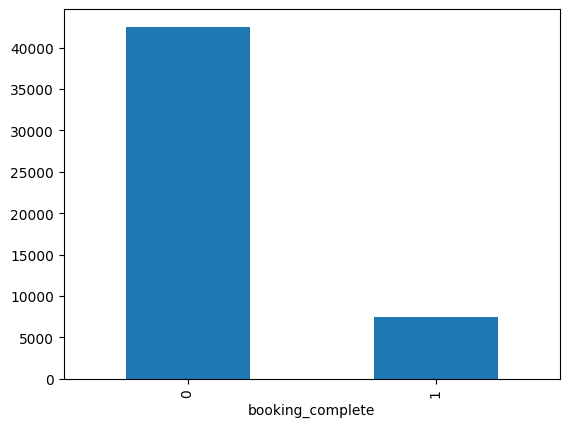

In [6]:
import matplotlib.pyplot as plt
df['booking_complete'].value_counts().plot(kind='bar')

In [8]:
df['trip_type'].value_counts(normalize=True)

trip_type
RoundTrip     0.98994
OneWay        0.00774
CircleTrip    0.00232
Name: proportion, dtype: float64

In [11]:
df['booking_origin'].value_counts(normalize=True)

booking_origin
Australia               0.35744
Malaysia                0.14348
South Korea             0.09118
Japan                   0.07770
China                   0.06774
                         ...   
Ghana                   0.00002
Gibraltar               0.00002
Guatemala               0.00002
Algeria                 0.00002
Svalbard & Jan Mayen    0.00002
Name: proportion, Length: 104, dtype: float64

In [12]:
len(df['num_passengers'].unique())

9

#### Quick Notes on First Look

+ Classification task - predict booking - already encoded for us
+ wants_extra_baggage already encoded
+ wants_preferred_seat already encoded
+ wants_inflight_meals already encoded
+ trip_type has to be encoded (or dropped due to cardinality)
+ can most likely drop booking_origin if Australia isnt telling, if so, encode Australia or not Australia
+ plot num_passengers vs booking
+ plot flight duration color coded with booking